<div class="alert alert-block alert-info"><h1 span style="font-size:20px;color:#AA0078;font-weight : bold"> Advertisement Revenue Prediction Model </span> </div>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Importing Data </span></div>

In [2]:
data = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\IITG SA DS\Hackathon\Train_Data.csv')

In [3]:
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [4]:
data.dtypes

date            object
campaign        object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

In [5]:
data.shape

(4571, 9)

In [6]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [7]:
data.ad.unique()

array(['ad 1', 'ad 2', 'ad 3', 'ad 4', 'ad 5', 'ad 6', 'ad 7', 'ad 8',
       'ad 9', 'ad 10', 'ad 11', 'ad 12', 'ad 13', 'ad 14', 'ad 15',
       'ad 16', 'ad 17', 'ad 18', 'ad 19', 'ad 20', 'ad 21', 'ad 22',
       'ad 23', 'ad 24', 'ad 25', 'ad 26', 'ad 27', 'ad 28', 'ad 29',
       'ad 30', 'ad 31', 'ad 32', 'ad 33', 'ad 34', 'ad 35', 'ad 36',
       'ad 37', 'ad 38', 'ad 39', 'ad 40', 'ad 41', 'ad 42', 'ad 43',
       'ad 44', 'ad 45', 'ad 46', 'ad 47', 'ad 48', 'ad 49', 'ad 50',
       'ad 51', 'ad 52', 'ad 53', 'ad 54', 'ad 55', 'ad 56', 'ad 57',
       'ad 58', 'ad 59', 'ad 60', 'ad 61', 'ad 62', 'ad 63', 'ad 64',
       'ad 65', 'ad 66', 'ad 67', 'ad 68', 'ad 69', 'ad 70'], dtype=object)

<span style="font-size:18px;color:#AA0078"> ** ad attribute has 70 unique categories. </span>

In [8]:
data.adgroup.unique()

array(['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'], dtype=object)

<span style="font-size:18px;color:#AA0078"> **adgroup attribute has 4 unique categories </span>

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Visualising the Data </span></div>

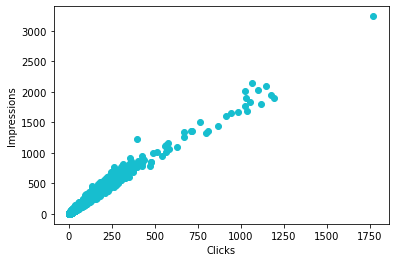

In [9]:
plt.scatter(data.clicks,data.impressions, c='#17becf')
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.show()

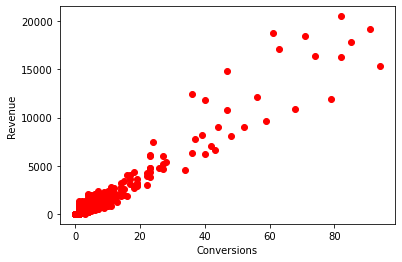

In [10]:
plt.scatter(data.conversions,data.revenue, c='red')
plt.xlabel('Conversions')
plt.ylabel('Revenue')
plt.show()

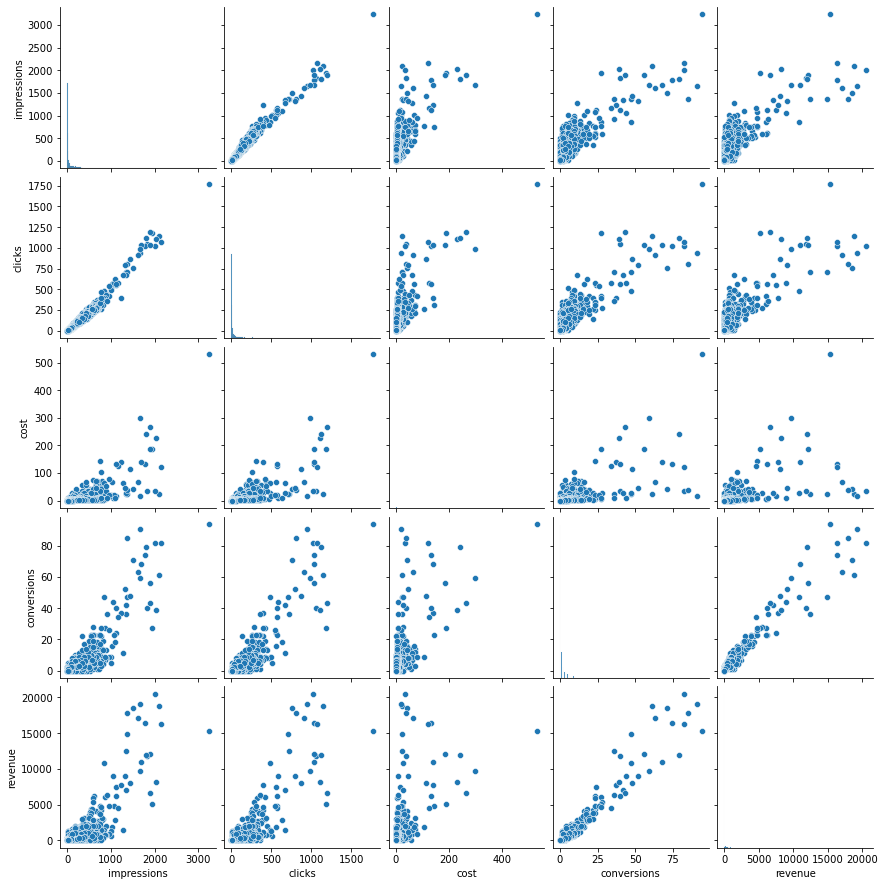

In [11]:
sns.pairplot(data, palette='rainbow')


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Plotting Correlation Matrix  </span></div>

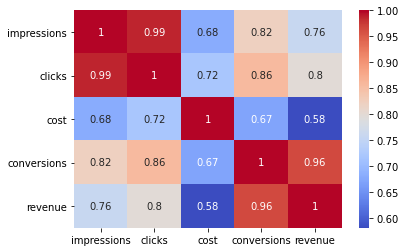

In [12]:
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Preprocessing Data </span></div>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


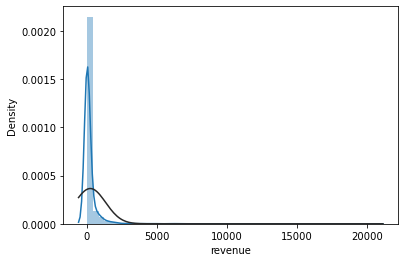

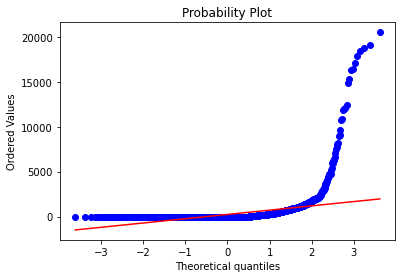

In [14]:
from scipy import stats
from scipy.stats import norm

sns.distplot(data['revenue'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['revenue'], plot=plt)

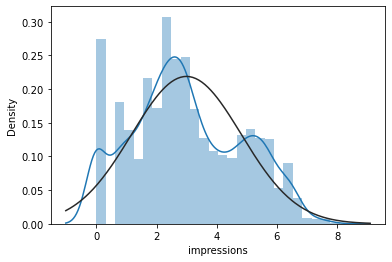

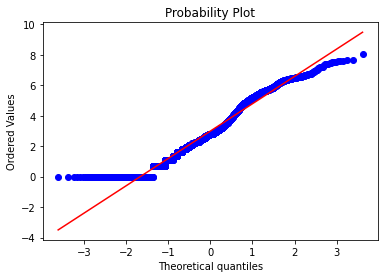

In [15]:
data['impressions'] = np.log(data.impressions)
sns.distplot(data['impressions'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['impressions'], plot=plt)

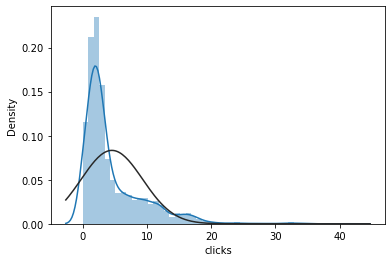

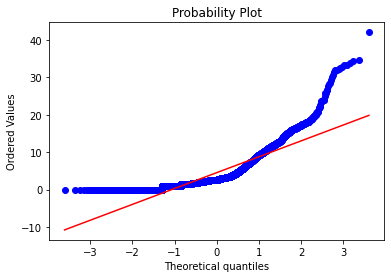

In [16]:
data['clicks'] = np.sqrt(data.clicks)
sns.distplot(data['clicks'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['clicks'], plot=plt)

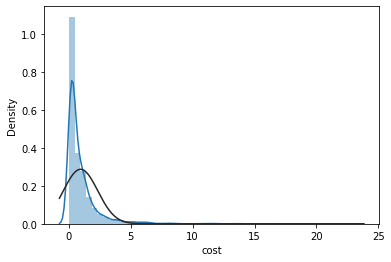

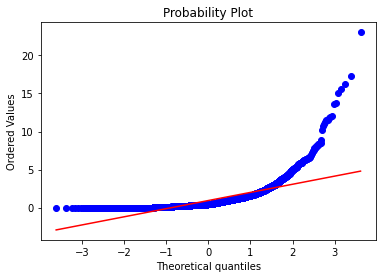

In [17]:
data['cost'] = np.sqrt(data.cost)
sns.distplot(data['cost'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['cost'], plot=plt)

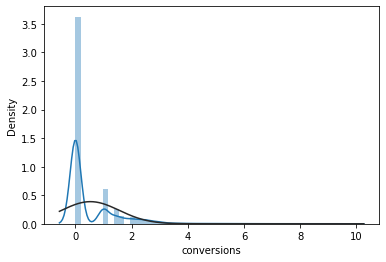

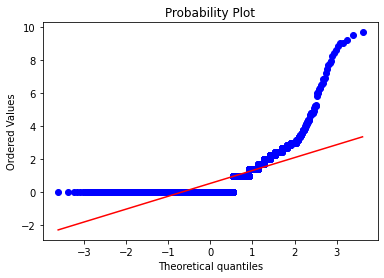

In [18]:
data['conversions'] = np.sqrt(data.conversions)
sns.distplot(data['conversions'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['conversions'], plot=plt)

In [19]:
#One Hot Encoding the adgroup column
dum = pd.get_dummies(data.adgroup)
data = pd.concat([data,dum],axis='columns')
data.drop(['adgroup'],axis='columns',inplace=True)

In [20]:
data.columns

Index(['date', 'campaign', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue', 'adgroup 1', 'adgroup 2', 'adgroup 3',
       'adgroup 4'],
      dtype='object')

In [21]:
#New 4 columns for adgroup are formed
data.head()

,date,campaign,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,01-08-2020,campaign 1,ad 1,3.178054,2.449490,0.282843,0.0,0.00,1,0,0,0
1,01-08-2020,campaign 1,ad 1,0.000000,0.000000,0.000000,0.0,0.00,0,1,0,0
2,01-08-2020,campaign 1,ad 1,2.564949,2.000000,0.200000,0.0,0.00,0,0,1,0
3,01-08-2020,campaign 1,ad 1,1.609438,2.000000,0.282843,0.0,0.00,0,0,0,1
4,01-08-2020,campaign 1,ad 2,5.509388,11.224972,1.135782,2.0,925.71,1,0,0,0


In [22]:
#Converting the ad attribute to integer type
data['ad'] = data.ad.str.strip('ad ').astype(int)
print(data.dtypes)
data.head()

date            object
campaign        object
ad               int32
impressions    float64
clicks         float64
cost           float64
conversions    float64
revenue        float64
adgroup 1        uint8
adgroup 2        uint8
adgroup 3        uint8
adgroup 4        uint8
dtype: object


,date,campaign,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,01-08-2020,campaign 1,1,3.178054,2.449490,0.282843,0.0,0.00,1,0,0,0
1,01-08-2020,campaign 1,1,0.000000,0.000000,0.000000,0.0,0.00,0,1,0,0
2,01-08-2020,campaign 1,1,2.564949,2.000000,0.200000,0.0,0.00,0,0,1,0
3,01-08-2020,campaign 1,1,1.609438,2.000000,0.282843,0.0,0.00,0,0,0,1
4,01-08-2020,campaign 1,2,5.509388,11.224972,1.135782,2.0,925.71,1,0,0,0



<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Outlier Analysis and Removal</span></div>

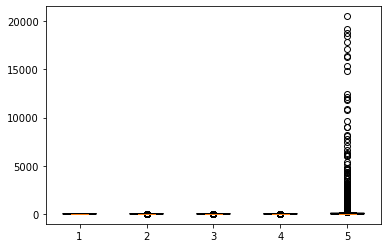

In [23]:
plt.boxplot(data[['impressions','clicks','cost','conversions','revenue']], patch_artist = True,
                notch ='True')
plt.show()

array([[<AxesSubplot:title={'center':'conversions'}>]], dtype=object)

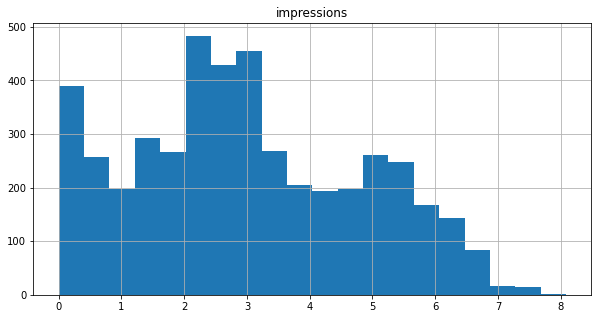

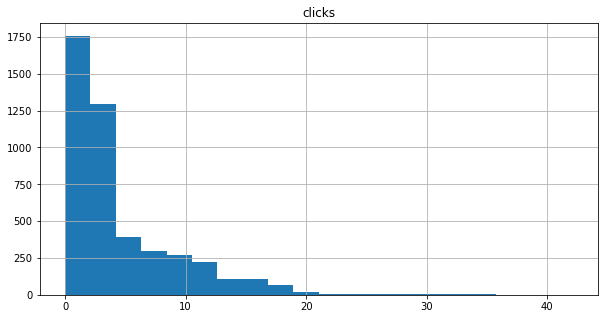

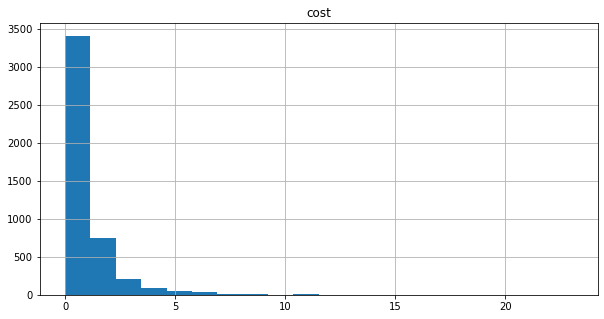

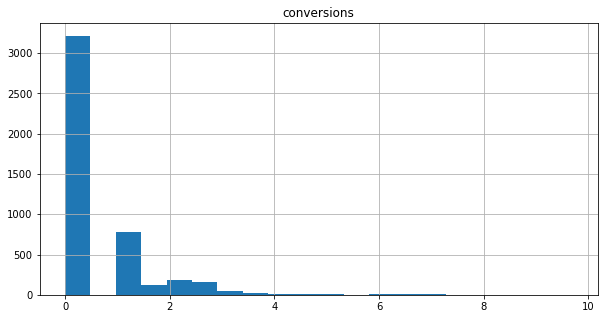

In [24]:
#Plotting Histograms of the numerical attributes
data.hist(column='impressions',bins=20,figsize=(10,5))
data.hist(column='clicks',bins=20,figsize=(10,5))
data.hist(column='cost',bins=20,figsize=(10,5))
data.hist(column='conversions',bins=20,figsize=(10,5))

In [25]:
data.head(2)

,date,campaign,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,01-08-2020,campaign 1,1,3.178054,2.44949,0.282843,0.0,0.0,1,0,0,0
1,01-08-2020,campaign 1,1,0.000000,0.00000,0.000000,0.0,0.0,0,1,0,0


In [26]:
#Processing the train data
train = data.drop(['date','campaign'], axis=1)
train.dtypes

ad               int32
impressions    float64
clicks         float64
cost           float64
conversions    float64
revenue        float64
adgroup 1        uint8
adgroup 2        uint8
adgroup 3        uint8
adgroup 4        uint8
dtype: object

In [27]:
z_scores = stats.zscore(train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train_no = train[filtered_entries]

Before Outlier Ananlysis No. of records->  (4571, 10)
After Outlier Ananlysis No. of records ->  (4433, 10)


<span style="font-size:18px;color:#AA0078"> **138 records have been removed after the outlier analysis </span>

In [28]:
train.head()

,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,1,3.178054,2.449490,0.282843,0.0,0.00,1,0,0,0
1,1,0.000000,0.000000,0.000000,0.0,0.00,0,1,0,0
2,1,2.564949,2.000000,0.200000,0.0,0.00,0,0,1,0
3,1,1.609438,2.000000,0.282843,0.0,0.00,0,0,0,1
4,2,5.509388,11.224972,1.135782,2.0,925.71,1,0,0,0


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Scaling the data to fit the model better </span></div>

In [29]:
Y_scaled = np.sqrt(train_no.revenue)
Y_scaled.count

<bound method Series.count of 0        0.000000
1        0.000000
2        0.000000
3        0.000000
4       30.425483
          ...    
4566     0.000000
4567     0.000000
4568     9.654015
4569     0.000000
4570     0.000000
Name: revenue, Length: 4433, dtype: float64>

In [30]:
train_no.drop('revenue', axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_no)

In [32]:
#Splitting Data into trian and test data 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_train_scaled,Y_scaled, test_size=0.2, random_state=20)

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Training Random Forest Regression Model with Hyperparamter tuning - Model 1</span></div>

In [33]:
model1 = RandomForestRegressor(n_estimators=100, min_samples_split=100, random_state=1)
model1.fit(train_x,train_y)

RandomForestRegressor(min_samples_split=100, random_state=1)

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Validating Model 1 </span></div>

In [34]:
print("Mean Sqaured Error for Train Data : ",mean_squared_error(train_y, model1.predict(train_x)))

Mean Sqaured Error for Train Data :  7.3107543784173075


In [35]:
print("Mean Sqaured Error for Test Data : ",mean_squared_error(test_y, model1.predict(test_x)))

Mean Sqaured Error for Test Data :  7.37014329432036


In [36]:
print("Model 1 Score = ",round(model1.score(train_x, train_y)*100,2),"%")

Model 1 Score =  92.08 %


In [37]:
from sklearn.metrics import r2_score
m1r2 = r2_score(model1.predict(test_x),test_y)*100
print("Model 1 R2 Score = ",round(m1r2,2),"%")

Model 1 R2 Score =  90.81 %


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Adding additional features to improve the performance of model </span></div>

In [38]:
data['CTR'] = (data.clicks)/data.impressions
data['CPC'] = data.cost/data.clicks
data['CPA'] = data.cost/data.conversions
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.median(),inplace=True)

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Visualising New Features</span></div>

array([[<AxesSubplot:title={'center':'CTR'}>]], dtype=object)

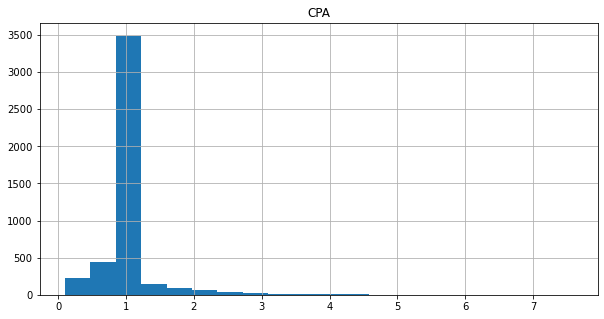

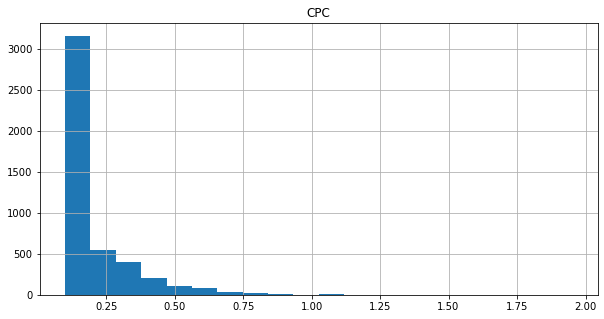

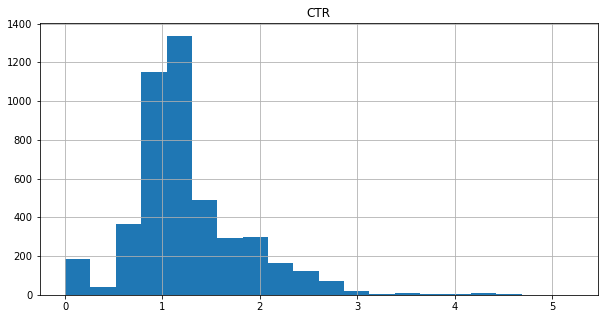

In [39]:
data.hist(column='CPA',bins=20,figsize=(10,5))
data.hist(column='CPC',bins=20,figsize=(10,5))
data.hist(column='CTR',bins=20,figsize=(10,5))

In [40]:
#Processing the train data
train2 = data.drop(['date','campaign'], axis=1)
train2.dtypes

ad               int32
impressions    float64
clicks         float64
cost           float64
conversions    float64
revenue        float64
adgroup 1        uint8
adgroup 2        uint8
adgroup 3        uint8
adgroup 4        uint8
CTR            float64
CPC            float64
CPA            float64
dtype: object


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Outlier Analysis and Removal with New Features</span></div>

In [41]:
z_scores2 = stats.zscore(train2)
abs_z_scores2 = np.abs(z_scores2)
filtered_entries2 = (abs_z_scores < 3).all(axis=1)
train_no2 = train2[filtered_entries2]
print(train2.shape)
print(train_no2.shape)

(4571, 13)
(4433, 13)


<span style="font-size:18px;color:#AA0078"> **138 records have been removed after the outlier analysis </span>

In [42]:
train2.head()

,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4,CTR,CPC,CPA
0,1,3.178054,2.449490,0.282843,0.0,0.00,1,0,0,0,0.770751,0.115470,0.861683
1,1,0.000000,0.000000,0.000000,0.0,0.00,0,1,0,0,1.117971,0.135146,0.861683
2,1,2.564949,2.000000,0.200000,0.0,0.00,0,0,1,0,0.779742,0.100000,0.861683
3,1,1.609438,2.000000,0.282843,0.0,0.00,0,0,0,1,1.242670,0.141421,0.861683
4,2,5.509388,11.224972,1.135782,2.0,925.71,1,0,0,0,2.037426,0.101183,0.567891


<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078">Scaling the data to fit the new Model Better </span></div>

In [43]:
Y_scaled2 = np.sqrt(train_no2.revenue)
Y_scaled2.count

<bound method Series.count of 0        0.000000
1        0.000000
2        0.000000
3        0.000000
4       30.425483
          ...    
4566     0.000000
4567     0.000000
4568     9.654015
4569     0.000000
4570     0.000000
Name: revenue, Length: 4433, dtype: float64>

In [44]:
train_no2.drop('revenue', axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(train_no2)

In [46]:
#Splitting Data into trian and test data 
from sklearn.model_selection import train_test_split
train_x2, test_x2, train_y2, test_y2 = train_test_split(X_train_scaled2,Y_scaled2, test_size=0.2, random_state=20)

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Training Random Forest Regression Model with New Features Hyperparamter tuning - Model 2 </span></div>

In [47]:
model2 = RandomForestRegressor(n_estimators=100, min_samples_split=50, random_state=1)
model2.fit(train_x2,train_y2)

RandomForestRegressor(min_samples_split=50, random_state=1)

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Validating Model 2</span></div>

In [48]:
print("Mean Sqaured Error for Train Data : ",mean_squared_error(train_y2, model2.predict(train_x2)))

Mean Sqaured Error for Train Data :  6.067590477194256


In [49]:
print("Mean Sqaured Error for Test Data : ",mean_squared_error(test_y2, model2.predict(test_x2)))

Mean Sqaured Error for Test Data :  7.1681076798217305


In [50]:
print("Model 2 Score = ",round(model2.score(train_x2, train_y2)*100,2),"%")

Model 2 Score =  93.42 %


In [51]:
m2r2 = r2_score(model2.predict(test_x2),test_y2)*100
print("Model 2 R2 Score = ",round(m2r2,2),"%")

Model 2 R2 Score =  91.25 %


<div class="alert alert-block alert-info"> <span style="font-size:18px;font-weight : bold;color:#AA0078"> Linear Regression - Model 3</span></div>

In [52]:
#Trying to fit linear regression model to the data
model3 = LinearRegression()

In [53]:
model3.fit(train_x2,train_y2)

LinearRegression()

<div class="alert alert-block alert-info"> <span style="font-size:17px;font-weight : bold;color:#AA0078"> Validating Model 3 </span></div>

In [54]:
print("Mean Sqaured Error for Train Data : ",mean_squared_error(train_y2, model3.predict(train_x2)))

Mean Sqaured Error for Train Data :  7.681213851488196


In [55]:
print("Mean Sqaured Error for Test Data : ",mean_squared_error(test_y2, model3.predict(test_x2)))

Mean Sqaured Error for Test Data :  7.028119397098421


In [56]:
print("Model 3 Score = ",round(model3.score(train_x2, train_y2)*100,2), '%')

Model 3 Score =  91.67 %


In [57]:
m3r2 = r2_score(model3.predict(test_x2),test_y2)*100
print("Model 3 R2 Score = ",round(m3r2,2),"%")

Model 3 R2 Score =  91.41 %


<div class="alert alert-block alert-info"> <span style="font-size:18px;font-weight : bold;color:#AA0078"> Support Vector Regression - Model 4</span></div>

In [58]:
from sklearn.svm import SVR
model4 = SVR()

In [59]:
model4.fit(train_x2,train_y2)

SVR()

In [60]:
print("Mean Sqaured Error for Train Data : ",mean_squared_error(train_y2, model4.predict(train_x2)))

Mean Sqaured Error for Train Data :  9.326595631685409


In [61]:
print("Mean Sqaured Error for Test Data : ",mean_squared_error(test_y2, model4.predict(test_x2)))

Mean Sqaured Error for Test Data :  9.711749610053449


In [62]:
print("Model 4 Score = ",round(model4.score(train_x2, train_y2)*100,2), "%")

Model 4 Score =  89.89 %


In [63]:
m4r2 = r2_score(model4.predict(test_x2),test_y2)*100
print("Model 4 R2 Score = ",round(m4r2,2),"%")

Model 4 R2 Score =  85.66 %


<div class="alert alert-block alert-info"> <span style="font-size:18px;font-weight : bold;color:#AA0078"> Comparing the 4 Models with Visualisation</span></div>

<span style="font-size:18px;color:#AA0078"> **Comparing on the Train Data </span>

In [64]:
models = ['Random Forest Regressor','Random Forest Regressor with new Features','Linear Regression','SVR']
model_score = [92.08,93.42,91.67,89.89]
MSE = [7.37,7.16,7.02,9.71]
Results = pd.DataFrame([models,model_score,MSE],index=['Model','Model_score (%)','MSE(Test)'])
Results = Results.transpose()
Results

,Model,Model_score (%),MSE(Test)
0,Random Forest Regressor,92.08,7.37
1,Random Forest Regressor with new Features,93.42,7.16
2,Linear Regression,91.67,7.02
3,SVR,89.89,9.71


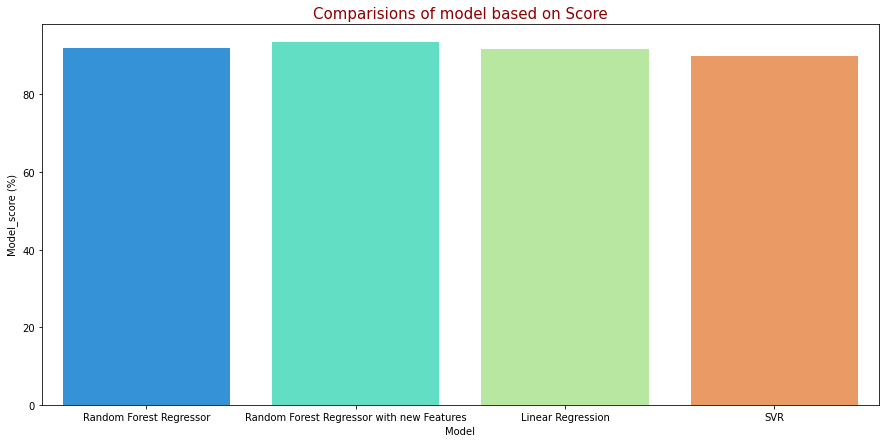

In [65]:
plt.figure(figsize=(15,7))
plt.title('Comparisions of model based on Score',fontdict={'fontsize':15,'color':'darkred'})
sns.barplot(x='Model',y='Model_score (%)',data = Results,palette='rainbow')
plt.show()

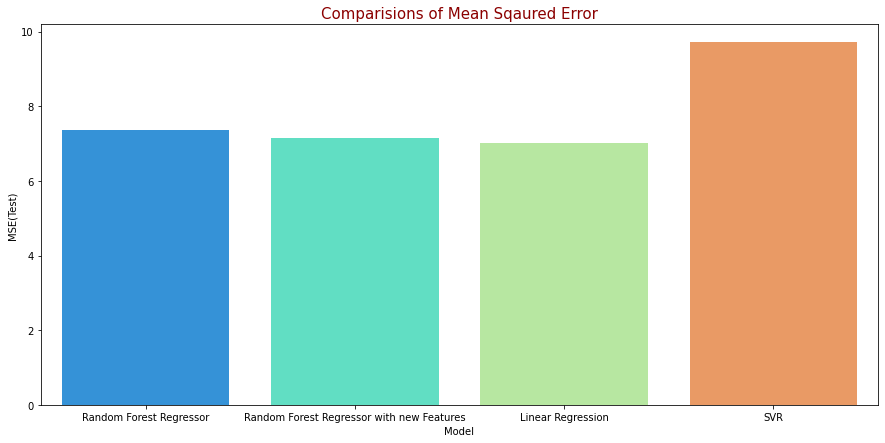

In [66]:
plt.figure(figsize=(15,7))
plt.title('Comparisions of Mean Sqaured Error',fontdict={'fontsize':15,'color':'darkred'})
sns.barplot(x='Model',y='MSE(Test)',data = Results,palette='rainbow')
plt.show()

# END OF CODE 